<a href="https://cognitiveclass.ai"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width = 400> </a>

<h1 align=center><font size = 5>Build a Regression Model in Keras</font></h1>


## Introduction


In this course project, you will build a regression model using the deep learning Keras library, and then you will experiment with increasing the number of training epochs and changing number of hidden layers and you will see how changing these parameters impacts the performance of the model.

This assignment will be marked by your peers and will be worth 20% of your total grade. The breakdown will be:
Part A: 5 marks
Part B: 5 marks
Part C: 5 marks
Part D: 5 marks

1. Assignment Topic:

In this project, you will build a regression model using the Keras library to model the same data about concrete compressive strength that we used in labs 3.

2. Concrete Data:

For your convenience, the data can be found here again: https://cocl.us/concrete_data. To recap, the predictors in the data of concrete strength include:

Cement
Blast Furnace Slag
Fly Ash
Water
Superplasticizer
Coarse Aggregate
Fine Aggregate
3. Assignment Instructions:

Please check the My Submission tab for detailed assignment instructions.

4. How to submit:

You will need to submit your code for each part in a Jupyter Notebook. Since each part builds on the previous one, you can submit the same notebook four times for grading. Please make sure that you:

use Markdown to clearly label your code for each part,
properly comment your code so that your peer who is grading your work is able to understand your code easily,
include your comments and discussion of the difference in the mean of the mean squared errors among the different parts.

<h2>Import the necessary libraries</h2>

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

<a id="item31"></a>


## Download and Clean Dataset


Let's start by importing the <em>pandas</em> and the Numpy libraries.


In [16]:
url = 'https://cocl.us/concrete_data'

# load concrete_data into pandas dataframe
concrete_data = pd.read_csv(url)

concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30



<strong>The dataset is about the compressive strength of different samples of concrete based on the volumes of the different ingredients that were used to make them. Ingredients include:</strong>

<strong>1. Cement</strong>

<strong>2. Blast Furnace Slag</strong>

<strong>3. Fly Ash</strong>

<strong>4. Water</strong>

<strong>5. Superplasticizer</strong>

<strong>6. Coarse Aggregate</strong>

<strong>7. Fine Aggregate</strong>


#### Let's check how many data points we have.


In [17]:
concrete_data.shape

(1030, 9)

So, there are approximately 1000 samples to train our model on. Because of the few samples, we have to be careful not to overfit the training data.


In [18]:
#Check for any missing values
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


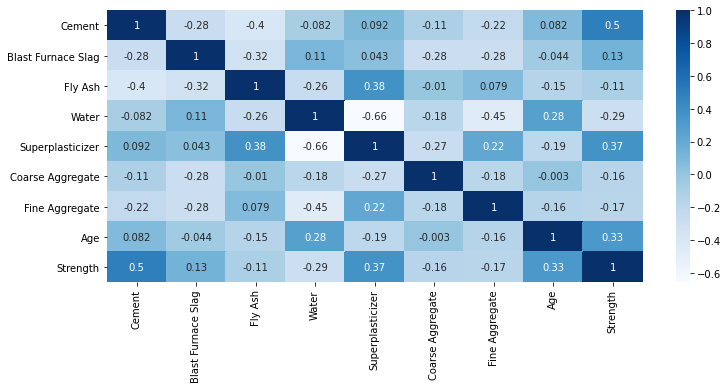

In [19]:
#Plot HeatMap of the dataset
plt.figure(figsize=(12, 5))
correlation_matrix = concrete_data.corr()
sns.heatmap(correlation_matrix,cmap="Blues", annot=True)
plt.show()

In [20]:
#Check for missing values
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

The data looks very clean and is ready to be used to build our model.


#### Split data into predictors and target . The target variable in this problem is the concrete sample strength. Therefore, our predictors will be all the other columns.


In [21]:
concrete_data_columns = concrete_data.columns
predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # Select all the columns but "Strength" as predictors
target = concrete_data['Strength'] # Select "Strength" as labels

#### Let's do a quick sanity check of the predictors and the target dataframes.


In [22]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [23]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [24]:
# number of predictors
n_cols = predictors.shape[1]
print(n_cols)

8


## PART A. 

### Build a baseline model 

In [25]:
# Hidden Layer: 1
# Nodes: 10
# Activation Function: ReLU
# Optimizer: Adam
# Loss Function: Mean Squared Error train_test_split: 70,30
# Epochs: 50

def regression_model():
    # creation of the model
    model = Sequential()
    model.add(Dense(10, activation = 'relu', input_shape = (n_cols,)))
    model.add(Dense(1))
    
    # compile the model
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return model

In [26]:
# Splitting the data set for training and testing
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=6)

In [27]:
# build model for part A
modelA = regression_model()
epochs = 50
modelA.fit(X_train,y_train,epochs = epochs, verbose = 1)

Epoch 1/50
23/23 [==============================] - 1s 1ms/step - loss: 155924.7943
Epoch 2/50
23/23 [==============================] - 0s 1ms/step - loss: 48949.1003
Epoch 3/50
23/23 [==============================] - 0s 995us/step - loss: 10733.6704
Epoch 4/50
23/23 [==============================] - 0s 1ms/step - loss: 2218.3309
Epoch 5/50
23/23 [==============================] - 0s 992us/step - loss: 1143.4808
Epoch 6/50
23/23 [==============================] - 0s 998us/step - loss: 1002.8914
Epoch 7/50
23/23 [==============================] - 0s 891us/step - loss: 951.7393
Epoch 8/50
23/23 [==============================] - 0s 1ms/step - loss: 955.3620
Epoch 9/50
23/23 [==============================] - 0s 1ms/step - loss: 853.8142
Epoch 10/50
23/23 [==============================] - 0s 1ms/step - loss: 800.4909
Epoch 11/50
23/23 [==============================] - 0s 1ms/step - loss: 739.3194
Epoch 12/50
23/23 [==============================] - 0s 1ms/step - loss: 716.8409
Epoch 1

In [28]:
loss_val = modelA.evaluate(X_test, y_test)
loss_val

10/10 [==============================] - 0s 2ms/step - loss: 264.8420


264.842041015625

In [29]:
y_hat = modelA.predict(X_test)

In [30]:
mse = mean_squared_error(y_test,y_hat)
print("Mean Squared Error = {}".format(mse))

Mean Squared Error = 264.84205271137705


In [31]:
mse_lst = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=6)
    modelA = regression_model()
    modelA.fit(X_train,y_train,epochs = 50, verbose = 0)
    
    y_hat = modelA.predict(X_test)
    mse = mean_squared_error(y_test,y_hat)
    mse_lst.append(mse)

In [32]:
mean = np.mean(mse_lst)
standard_deviation = np.std(mse_lst)

print("Mean = {}, Standard Deviation = {}".format(mean,standard_deviation))

Mean = 322.68764682144445, Standard Deviation = 408.05683427218173


<a id="item1"></a>


## PART B

#### Repeat Part A but use a normalized version of the data. Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.


In [33]:
# Normalizing Predictors and printing the first five rows.
predictors_norm = (predictors- predictors.mean())/predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [34]:
# Splitting the normalized data set for training and testing
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(predictors_norm, target, test_size=0.3, random_state=6)

In [35]:
#Build model for Part B and training it
modelB = regression_model()
epochs = 50
modelB.fit(X_train_norm,y_train_norm,epochs = epochs, verbose = 1)

Epoch 1/50
23/23 [==============================] - 0s 1ms/step - loss: 1489.6435
Epoch 2/50
23/23 [==============================] - 0s 1ms/step - loss: 1398.7024
Epoch 3/50
23/23 [==============================] - 0s 1ms/step - loss: 1403.3345
Epoch 4/50
23/23 [==============================] - 0s 995us/step - loss: 1416.5783
Epoch 5/50
23/23 [==============================] - 0s 1ms/step - loss: 1366.6486
Epoch 6/50
23/23 [==============================] - 0s 989us/step - loss: 1370.5165
Epoch 7/50
23/23 [==============================] - 0s 988us/step - loss: 1340.3466
Epoch 8/50
23/23 [==============================] - 0s 919us/step - loss: 1281.6114
Epoch 9/50
23/23 [==============================] - 0s 1ms/step - loss: 1403.0104
Epoch 10/50
23/23 [==============================] - 0s 1ms/step - loss: 1342.4880
Epoch 11/50
23/23 [==============================] - 0s 1ms/step - loss: 1205.0689
Epoch 12/50
23/23 [==============================] - 0s 925us/step - loss: 1255.8186
Epo

In [36]:
# Evaluate the model on the test data set
loss_valB = modelB.evaluate(X_test_norm, y_test_norm)
loss_valB

10/10 [==============================] - 0s 1ms/step - loss: 375.3755


375.3755187988281

In [37]:
y_hat_norm = modelB.predict(X_test_norm)

In [38]:
mseB = mean_squared_error(y_test_norm,y_hat_norm)
print("Mean Squared Error for normalized predictors = {}".format(mseB))

Mean Squared Error for normalized predictors = 375.37555303703004


In [39]:
mse_lst_B = []
for i in range(50):
    X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(predictors_norm, target, test_size=0.3, random_state=6)
    modelB = regression_model()
    modelB.fit(X_train_norm,y_train_norm,epochs = 50, verbose = 0)
    
    y_hat_norm = modelB.predict(X_test_norm)
    mseB = mean_squared_error(y_test_norm,y_hat_norm)
    mse_lst_B.append(mseB)

In [40]:
mean_B = np.mean(mse_lst_B)
standard_deviation_B = np.std(mse_lst_B)

print("For Mean Squared Errors, Mean = {}, Standard Deviation = {}".format(mean_B,standard_deviation_B))

For Mean Squared Errors, Mean = 427.937678727298, Standard Deviation = 114.11577155326906


#### How does the mean of the mean squared errors compare to that from Step A?

The mean of the mean squared error has gone up, but the standard deviation has gone down significantly. 


<a id="item4"></a>


<a id='item34'></a>


## PART C

### Repeat Part B but use 100 epochs this time for training.


In [41]:
# Splitting the normalized data set for training and testing
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(predictors_norm, target, test_size=0.3, random_state=6)

In [42]:
#Build model for Part C and training it
modelC = regression_model()
epochs = 100
modelC.fit(X_train_C,y_train_C,epochs = epochs, verbose = 1)

Epoch 1/100
23/23 [==============================] - 1s 1ms/step - loss: 1445.4780
Epoch 2/100
23/23 [==============================] - 0s 1ms/step - loss: 1434.9959
Epoch 3/100
23/23 [==============================] - 0s 974us/step - loss: 1342.5035
Epoch 4/100
23/23 [==============================] - 0s 1ms/step - loss: 1386.2236
Epoch 5/100
23/23 [==============================] - 0s 1ms/step - loss: 1366.7898
Epoch 6/100
23/23 [==============================] - 0s 1ms/step - loss: 1370.0924
Epoch 7/100
23/23 [==============================] - 0s 1ms/step - loss: 1365.3393
Epoch 8/100
23/23 [==============================] - 0s 1ms/step - loss: 1381.1722
Epoch 9/100
23/23 [==============================] - 0s 1ms/step - loss: 1213.3177
Epoch 10/100
23/23 [==============================] - 0s 1ms/step - loss: 1275.7311
Epoch 11/100
23/23 [==============================] - 0s 1ms/step - loss: 1257.3839
Epoch 12/100
23/23 [==============================] - 0s 980us/step - loss: 1233.69

In [43]:
loss_valC = modelC.evaluate(X_test_C, y_test_C)
loss_valC

10/10 [==============================] - 0s 1ms/step - loss: 175.2704


175.27044677734375

In [44]:
y_hat_C = modelC.predict(X_test_C)

In [45]:
mseC = mean_squared_error(y_test_C,y_hat_C)
print("Mean Squared Error for normalized predictors with 100 epoch training = {}".format(mseC))

Mean Squared Error for normalized predictors with 100 epoch training = 175.27042669262588


In [46]:
mse_lst_C = []
for i in range(50):
    X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(predictors_norm, target, test_size=0.3, random_state=6)
    modelC = regression_model()
    modelC.fit(X_train_C,y_train_C,epochs = 100, verbose = 0)
    
    y_hat_C = modelC.predict(X_test_C)
    mseC = mean_squared_error(y_test_C,y_hat_C)
    mse_lst_C.append(mseC)

In [47]:
mean_C = np.mean(mse_lst_C)
standard_deviation_C = np.std(mse_lst_C)

print("For Mean Squared Errors with 100 epochs for training, Mean = {}, Standard Deviation = {}".format(mean_C,standard_deviation_C))

For Mean Squared Errors with 100 epochs for training, Mean = 192.08711314493897, Standard Deviation = 11.692718619343678


In [48]:
mean_change_percentage = ((mean_B - mean_C)/mean_B)*100
print("The mean of the mean squared errors have decreased by {}% relative to 50 epoch training.".format(mean_change_percentage))

The mean of the mean squared errors have decreased by 55.11329740437605% relative to 50 epoch training.


#### How does the mean of the mean squared errors compare to that from Step B?

The mean squared error on the test set more than halved. Clearly, there was plenty of improvement to be gained with additional training. The standard deviation has gone down a lot as well.

## PART D

### Increase the number of hidden layers


In [49]:
def regression_model_modified():
    # creation of the model
    model = Sequential()
    model.add(Dense(10, activation = 'relu', input_shape = (n_cols,)))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1))
    
    # compile the model
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return model

In [50]:
# Splitting the normalized data set for training and testing
X_train_D, X_test_D, y_train_D, y_test_D = train_test_split(predictors_norm, target, test_size=0.3, random_state=6)

In [51]:
# Build model for Part D and training it
modelD = regression_model_modified()
epochs = 50
modelD.fit(X_train_D,y_train_D,epochs = epochs, verbose = 1)

Epoch 1/50
23/23 [==============================] - 0s 1ms/step - loss: 1422.6103
Epoch 2/50
23/23 [==============================] - 0s 1ms/step - loss: 1499.7356
Epoch 3/50
23/23 [==============================] - 0s 1ms/step - loss: 1469.1653
Epoch 4/50
23/23 [==============================] - 0s 1ms/step - loss: 1369.2741
Epoch 5/50
23/23 [==============================] - 0s 1ms/step - loss: 1331.1614
Epoch 6/50
23/23 [==============================] - 0s 1ms/step - loss: 1343.5673
Epoch 7/50
23/23 [==============================] - 0s 1ms/step - loss: 1173.9593
Epoch 8/50
23/23 [==============================] - 0s 1ms/step - loss: 1035.2273
Epoch 9/50
23/23 [==============================] - 0s 1ms/step - loss: 785.1913
Epoch 10/50
23/23 [==============================] - 0s 1ms/step - loss: 573.7735
Epoch 11/50
23/23 [==============================] - 0s 1ms/step - loss: 428.1438
Epoch 12/50
23/23 [==============================] - 0s 1ms/step - loss: 307.5234
Epoch 13/50
23/23

In [52]:
loss_valD = modelD.evaluate(X_test_D, y_test_D)
loss_valD

10/10 [==============================] - 0s 1ms/step - loss: 160.6094


160.609375

In [53]:
y_hat_D = modelD.predict(X_test_D)

In [54]:
mseD = mean_squared_error(y_test_D,y_hat_D)
print("Mean Squared Error for normalized predictors with 3 dense layer network = {}".format(mseD))

Mean Squared Error for normalized predictors with 3 dense layer network = 160.60937780058927


In [55]:
mse_lst_D = []
for i in range(50):
    X_train_D, X_test_D, y_train_D, y_test_D = train_test_split(predictors_norm, target, test_size=0.3, random_state=6)
    modelD = regression_model_modified()
    modelD.fit(X_train_D,y_train_D,epochs = 50, verbose = 0)
    
    y_hat_D = modelD.predict(X_test_D)
    mseD = mean_squared_error(y_test_D,y_hat_D)
    mse_lst_D.append(mseD)

In [56]:
mean_D = np.mean(mse_lst_D)
standard_deviation_D = np.std(mse_lst_D)

print("For Mean Squared Errors with 3 dense layer network, Mean = {}, Standard Deviation = {}".format(mean_D,standard_deviation_D))

For Mean Squared Errors with 3 dense layer network, Mean = 151.49690558692168, Standard Deviation = 15.400859145007217


In [57]:
mean_change_percentage2 = ((mean_B - mean_D)/mean_B)*100
print("The mean of the mean squared errors have decreased by {}% relative to 1 dense layer network.".format(mean_change_percentage2))

The mean of the mean squared errors have decreased by 64.59837188501865% relative to 1 dense layer network.


### How does the mean of the mean squared errors compare to that from Step B?

The mean of the mean squared errors is a lot better than in part B.
This shows that the network with multiple hidden layers was significantly better at learning to predict the 'Strength' feature than the single layer network.